In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LassoLars, BayesianRidge, Lars, ARDRegression
from sklearn.linear_model import TweedieRegressor, GammaRegressor, PoissonRegressor, SGDRegressor, RANSACRegressor
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, VotingRegressor
from sklearn.svm import LinearSVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.cross_decomposition import PLSRegression
from sklearn.neural_network import MLPRegressor
import h2o
from h2o.automl import H2OAutoML
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

In [6]:
uno = pd.read_csv('test1_lin_reg.csv')
dos = pd.read_csv('test2_rand_for.csv')
tres = pd.read_csv('test3_rand_for_rand_sear_poly.csv')
cuatro = pd.read_csv('test4_mean_opti_rand_for_GBR.csv')
cinco = pd.read_csv('test5_brute_ARDR.csv')
seis = pd.read_csv('test6_mean_OptiRF_GBR_ARDR.csv')
siete = pd.read_csv('test7_GBR_some_params.csv')
ocho = pd.read_csv('test8_OptiHGBR.csv')
nueve = pd.read_csv('test9_Voting_OptiHGB_OptiRF.csv')
diez = pd.read_csv('test10_OptiXGB.csv')
once = pd.read_csv('test11_mean_best_3.csv')


In [55]:
list_ = [dos['price'], tres['price'], cuatro['price'], cinco['price'], seis['price'], siete['price'], 
         ocho['price'], nueve['price'], diez['price'], once['price']]

In [58]:
rename = [x.rename(f'price{ind+2}') for ind,x in enumerate(list_)]

In [31]:
a = range(len(list_))
b= iter(a)
c=next(b)

In [75]:
join =  uno.join(rename).drop(columns=['id','price5'])

In [76]:
join['mean'] = join.mean(axis=1)

In [77]:
join

,price,price2,price3,price4,price6,price7,price8,price9,price10,price11,mean
0,6.128596,6.105322,6.104418,6.092535,6.656297,6.080651,6.100141,6.091104,6.000855,6.064033,6.142395
1,8.579496,8.555089,8.582553,8.589776,8.321125,8.597000,8.571858,8.580321,8.543080,8.565086,8.548538
2,9.588514,9.511272,9.538174,9.495191,8.924735,9.452208,9.531522,9.538497,9.446328,9.505449,9.453189
3,7.995561,7.858245,7.849959,7.846522,7.825622,7.843085,7.859358,7.854309,7.851577,7.855081,7.863932
4,9.203214,8.903984,8.927164,8.902009,8.529280,8.876854,8.921503,8.928881,8.908609,8.919664,8.902116
...,...,...,...,...,...,...,...,...,...,...,...
13480,8.588979,8.565829,8.559128,8.565517,8.304952,8.571907,8.538340,8.551399,8.540738,8.543493,8.533028
13481,8.316564,8.376451,8.389733,8.381151,8.182041,8.372569,8.400347,8.390337,8.413206,8.401297,8.362369
13482,6.405458,6.414605,6.388267,6.399811,6.861148,6.411356,6.441117,6.427512,6.426709,6.431779,6.460776
13483,8.655963,8.710455,8.692927,8.727910,8.413214,8.762893,8.742050,8.705163,8.715922,8.721045,8.684754


In [79]:
send = pd.DataFrame(join['mean'])
csv = send.rename(columns={0:'price','mean':'price'})
csv.index.name='id'
csv.to_csv('test12_mean_everything.csv')

<AxesSubplot:ylabel='price6'>

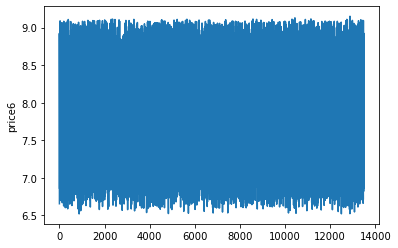

In [89]:
sns.lineplot(data=join['price6'])